# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
import plotly.graph_objects as go
from datetime import datetime

In [2]:
path="/Users/jameswang/Desktop/22S2/data5703/Data_OANDA/"

# 2. Detect Pattern

In [3]:
#load file
def load_file(file):
    df = pd.read_csv(path+file)
    df.columns=['datetime', 'open', 'high', 'low', 'close']
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.000000000Z')
    
    return df


## 2.1 Channel_up
reference:
<br>
https://www.investopedia.com/terms/a/ascendingchannel.asp
<br>
https://tlc.thinkorswim.com/center/reference/Patterns/Classic-Patterns/Channel-Up
<br>
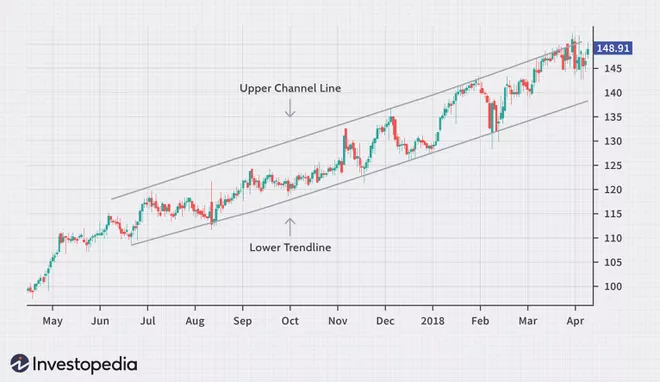


<br>
The Channel Up pattern is identified when there are two parallel lines, both moving up to the right across respective peaks (upper line) and bottoms (lower line). 

In [4]:
def detect_channel_up(df,w,s):
    
    
    local_min = np.array([])
    local_max = np.array([])
    max_idx = np.array([])
    min_idx = np.array([])
    
    #determine and store local min, local max and their index
    for i in range(0,len(df),w):
        local_max = np.append(local_max, df.low.iloc[i:i+w].max()) 
        max_idx = np.append(max_idx, df.low.iloc[i:i+w].idxmax())
        
        local_min = np.append(local_min, df.low.iloc[i:i+w].min()) 
        min_idx = np.append(min_idx, df.low.iloc[i:i+w].idxmin())

        
    channel_up = np.array([0]*len(df))
    
    count = 0
    n=0
    total_patterns=0
    index_list=[]
    
    
    for i in range(0,len(local_min),s):

        k_min, b_min = np.polyfit(min_idx[i:i+s], local_min[i:i+s],1)
        k_max, b_max = np.polyfit(max_idx[i:i+s], local_max[i:i+s],1)
    
        m = int(min_idx[count])
        
        #both lines need to be positive
        if k_min>0 and k_max>0:
            
            #check ratios of the slope 
            if k_min/k_max <1.1 and k_min/k_max>0.9:
                channel_up[n:m] = 1
                total_patterns+=1
                for j in range (n,m):
                    index_list.append(j)
        n=m
        count +=s
    
    df["channel_up"] = channel_up
    
    return df,total_patterns,index_list

In [5]:
df = load_file("GBP_JPY_M30_2005_202206.csv")
df,n,index_list = detect_channel_up(df,5,20)

## 2.2 Channel_down
reference:
<br>
https://www.investopedia.com/terms/a/ascendingchannel.asp
<br>
https://tlc.thinkorswim.com/center/reference/Patterns/Classic-Patterns/Channel-Down
<br>
The Channel Down pattern is identified when there are two parallel lines, both moving down to the right across respective peaks (upper line) and bottoms (lower line). 

In [6]:
def detect_channel_down(df,w,s):
    
    
    local_min = np.array([])
    local_max = np.array([])
    max_idx = np.array([])
    min_idx = np.array([])
    
    #determine and store local min, local max and their index
    for i in range(0,len(df),w):
        local_min = np.append(local_min, df.low.iloc[i:i+w].min()) 
        min_idx = np.append(min_idx, df.low.iloc[i:i+w].idxmin())


        local_max = np.append(local_max, df.low.iloc[i:i+w].max()) 
        max_idx = np.append(max_idx, df.low.iloc[i:i+w].idxmax())
        
    channel_down = np.array([0]*len(df))
    
    count = 0
    n=0
    total_patterns=0
    index_list=[]
    
    for i in range(0,len(local_max),s):
        
        k_max, b_max = np.polyfit(max_idx[i:i+s], local_max[i:i+s],1)
        k_min, b_min = np.polyfit(min_idx[i:i+s], local_min[i:i+s],1)
    
        m = int(max_idx[count])
        if k_min<0 and k_max<0:
        #both slopes have to be negative
            
            #check ratios of the slope 
            if k_min/k_max <1.1 and k_min/k_max>0.9:
                channel_down[n:m] = 1
                total_patterns+=1
                for j in range (n,m+1):
                    index_list.append(j)
        n=m
        count +=s
    
    df["channel_down"] = channel_down
    
    return df,total_patterns,index_list

In [7]:
import warnings
warnings.filterwarnings('ignore')
w = 5
s = 10
files = ["GBP_JPY_M5_2005_202206.csv",
         "GBP_JPY_M15_2005_202206.csv",
         "GBP_JPY_M30_2005_202206.csv",
         "GBP_JPY_H1_2005_202206.csv",
         "GBP_JPY_H4_2005_202206.csv",
         "GBP_JPY_D_2005_202206.csv"]
numer_of_patterns = []
for file in files:
    df = load_file(file)
    df,n,l = detect_channel_up(df,w,s)
    numer_of_patterns.append(n)
    print("total number of channel_up detected in " + file + ": " + str(n))

numer_of_patterns = []

for file in files:
    df = load_file(file)
    df,n,l = detect_channel_down(df,w,s)
    numer_of_patterns.append(n)
    print("total number of channel_down detected in " + file + ": " + str(n))

total number of channel_up detected in GBP_JPY_M5_2005_202206.csv: 3348
total number of channel_up detected in GBP_JPY_M15_2005_202206.csv: 1043
total number of channel_up detected in GBP_JPY_M30_2005_202206.csv: 647
total number of channel_up detected in GBP_JPY_H1_2005_202206.csv: 354
total number of channel_up detected in GBP_JPY_H4_2005_202206.csv: 81
total number of channel_up detected in GBP_JPY_D_2005_202206.csv: 14
total number of channel_down detected in GBP_JPY_M5_2005_202206.csv: 2928
total number of channel_down detected in GBP_JPY_M15_2005_202206.csv: 940
total number of channel_down detected in GBP_JPY_M30_2005_202206.csv: 548
total number of channel_down detected in GBP_JPY_H1_2005_202206.csv: 301
total number of channel_down detected in GBP_JPY_H4_2005_202206.csv: 70
total number of channel_down detected in GBP_JPY_D_2005_202206.csv: 13
